<a href="https://colab.research.google.com/github/zahra-jazini/AI-DS-Network-Security-Portfolio/blob/main/SentiADRV01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Install Required Libraries
# (Run in Colab or terminal)
!pip install pandas numpy scikit-learn nltk gensim matplotlib seaborn spacy
!python -m nltk.downloader stopwords
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 100.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
  Att

In [4]:
!pip uninstall -y numpy
!pip install numpy==1.24.3


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 95.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
tsfresh 0.21.0 require

In [1]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
import nltk
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from gensim.models import Word2Vec
from gensim import corpora, models
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# 📥 Step 3: Load Dataset
df = pd.read_csv('/content/sample_data/DrugReviews.csv')  # Replace with actual file
df = df[['Reviews', 'Rating']].dropna()


In [4]:
df = df.rename(columns={'Reviews': 'review_text', 'Rating': 'rating'})


In [13]:
print(df.columns)


Index(['review_text', 'rating', 'label'], dtype='object')


In [17]:
import nltk
import spacy
from nltk.corpus import stopwords

nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       119
         1.0       0.73      0.63      0.68        81

    accuracy                           0.76       200
   macro avg       0.75      0.73      0.74       200
weighted avg       0.75      0.76      0.75       200



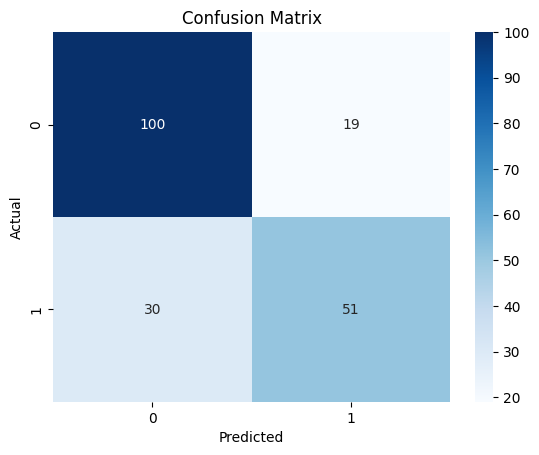

In [24]:
# ✅ STEP 1: نصب کتابخانه‌ها (در Google Colab)
# !pip install pandas numpy scikit-learn nltk gensim matplotlib seaborn spacy
# !python -m nltk.downloader stopwords
# !python -m spacy download en_core_web_sm

# ✅ STEP 2: وارد کردن کتابخانه‌ها
import pandas as pd
import numpy as np
import nltk
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from gensim.models import Word2Vec
from gensim import corpora, models
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ✅ STEP 3: بارگذاری فایل واقعی
df = pd.read_csv('/content/sample_data/DrugReviews.csv')
df = df[['Reviews', 'Rating']].dropna()
df = df.rename(columns={'Reviews': 'review_text', 'Rating': 'rating'})

# ✅ STEP 4: برچسب‌گذاری داده‌ها
def map_label(rating):
    if rating >= 8:
        return 0  # Non-ADR
    elif rating <= 4:
        return 1  # ADR
    else:
        return np.nan

df['label'] = df['rating'].apply(map_label)
df = df.dropna(subset=['label']).reset_index(drop=True)

# ✅ STEP 5: پیش‌پردازش متن
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm')

def clean_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]
    return ' '.join(tokens)

# برای کاهش زمان، نمونه‌گیری روی ۱۰۰۰ داده (می‌توانی عدد را تغییر دهی)
df_sample = df.sample(n=1000, random_state=42).reset_index(drop=True)
df_sample['clean_text'] = df_sample['review_text'].apply(clean_text)

# ✅ STEP 6: استخراج ویژگی‌ها (TF-IDF + Word2Vec + LDA)
tokenized = [text.split() for text in df_sample['clean_text']]

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(df_sample['clean_text'])

# Word2Vec
w2v_model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=2)
X_w2v = np.array([np.mean([w2v_model.wv[word] for word in words if word in w2v_model.wv]
                          or [np.zeros(100)], axis=0) for words in tokenized])

# LDA
num_topics = 10
dictionary = corpora.Dictionary(tokenized)
corpus = [dictionary.doc2bow(text) for text in tokenized]
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=5)

def lda_to_vector(lda_model, corpus, num_topics):
    vectors = []
    for doc in corpus:
        topic_prob = np.zeros(num_topics)
        for topic_id, prob in lda_model[doc]:
            topic_prob[topic_id] = prob
        vectors.append(topic_prob)
    return np.array(vectors)

X_lda = lda_to_vector(lda_model, corpus, num_topics)

# ✅ STEP 7: ترکیب ویژگی‌ها و نرمال‌سازی
X_combined = np.hstack([X_tfidf.toarray(), X_w2v, X_lda])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# ✅ STEP 8: آموزش مدل (Logistic Regression)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_sample['label'], test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=500, class_weight='balanced')
model.fit(X_train, y_train)

# ✅ STEP 9: ارزیابی نهایی
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
